Hi Avi. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

You've worked really hard and submitted a solid project. While there's room for improvement, on the whole, your project is looking good. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. One more time and you'll have it!
    
## Review v. 2<a class="tocSkip">
    
Your corrections look great, you've improved your work significantly! I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint! 

# Research on telecom plans

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Well done that you clearly described the project, but please formulate a goal of it explicitly.
</div>

<div class="alert alert-info"> <b> what do you mean? i just copied the way it was done in the previous project where it was pre-written by practicum...</b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
I mean to add your own formulation of the goal of the project.
</div>

## Step 1. Open the data file and study the general information

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# reading the file
try:
    users = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\3rd project\megaline_users.csv')
    plans = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\3rd project\megaline_plans.csv')
    messages = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\3rd project\megaline_messages.csv')
    internet = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\3rd project\megaline_internet.csv')
    calls = pd.read_csv(r'C:\Users\Avi\Desktop\D.A\Practicum\Projects\3rd project\megaline_calls.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    calls = pd.read_csv('/datasets/megaline_calls.csv')

# copying the data so it will load faster
users_raw = users.copy()
plans_raw = plans.copy()
messages_raw = messages.copy()
internet_raw = internet.copy()
calls_raw = calls.copy()

# checking the columns for nulls and type and other info
users_raw.info()
print()
plans_raw.info()
print()
messages_raw.info()
print()
internet_raw.info()
print()
calls_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 no

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job for using try-except for the path to the file.
</div>

seems only the users table has nulls so ill focus on it first:

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you correctly noted that we have a missing values.
</div>

In [3]:
# checking the first 10 rows of the data to see the values
users_raw.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


* it says in the project that "if the value is missing, the calling plan was being used when this data was retrieved" so ill replace the null with 'current date' i guess, or the actual current date so hat i will be able to convert it to date-type later.
* i can change the plan column into 0/1 instead of words and then itll be more usable to do corr.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable decision :)
</div>

In [4]:
# using describe to see more info
users_raw.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [5]:
users_raw.describe(include = ['object'])

,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Leonila,Caldwell,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12,surf,2018-12-18
freq,3,3,80,5,339,3


In [6]:
# checking the percentage of nulls in each column
pna = users_raw.isnull().sum() / users_raw.shape[0] * 100
print('Proportion of NAN per column \n\n', pna ,'\n\n Sum of NAN per column \n\n', users_raw.isnull().sum())

Proportion of NAN per column 

 user_id        0.0
first_name     0.0
last_name      0.0
age            0.0
city           0.0
reg_date       0.0
plan           0.0
churn_date    93.2
dtype: float64 

 Sum of NAN per column 

 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you calculated the percentage of a missing values in the columns.
</div>

In [7]:
# checking the data to see the values
plans_raw

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [8]:
# using describe to see more info
plans_raw.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [9]:
plans_raw.describe(include = ['object'])

,plan_name
count,2
unique,2
top,ultimate
freq,1


In [10]:
# checking the first 10 rows of the data to see the values
messages_raw.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [11]:
# using describe to see more info
messages_raw.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


the max user id here is 1497, where is 1498 and 1499? maybe they werent sending messages..

In [12]:
messages_raw.describe(include = ['object'])

,id,message_date
count,76051,76051
unique,76051,351
top,1089_16,2018-12-28
freq,1,702


since the count and unique number of id is the same i can conclude there are no duplicates here

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You are right, we don't have duplicates in our data.
</div>

In [13]:
# checking the first 10 rows of the data to see the values
internet_raw.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


seems like we miss the 30/12/2018 date here for user 1000 and it isnt just a day the user didnt use the web, because then we would have seen a row with 0 mb like the 2nd row.

In [14]:
# using describe to see more info
internet_raw.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [15]:
internet_raw.describe(include = ['object'])

,id,session_date
count,104825,104825
unique,104825,351
top,1089_16,2018-12-24
freq,1,851


since the count and unique number of id is the same i can conclude there are no duplicates here

In [16]:
# checking the first 10 rows of the data to see the values
calls_raw.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [17]:
# using describe to see more info
calls_raw.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


about the 0 call duration in the project it says: "many calls have a duration of 0.0 minutes. These might be missed calls." so dependant on what i need to do i will decide if to remove those rows or not.

In [18]:
calls_raw.describe(include = ['object'])

,id,call_date
count,137735,137735
unique,137735,351
top,1411_219,2018-12-27
freq,1,1091


since the count and unique number of id is the same i can conclude there are no duplicates here

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

### Conclusion

1 column have nulls in the users table that im not sure its best to fill, and some columns are of the wrong type in all the tables (dates)

it says in the project that "if the value is missing, the calling plan was being used when this data was retrieved" so ill replace the null with 'current date' i guess, or the actual current date so that i will be able to convert it to date-type later.

the city column is a mess but im not sure if i should or can order it.

maybe i should combine the first and last name to one column.

i can change the plan column into 0/1 instead of words and then itll be more usable to do corr.

the min call duration is 0 and its stated in the project that: "many calls have a duration of 0.0 minutes. These might be missed calls." so ill see, maybe ill remove those rows later.

i need to check for duplicates only in users table

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you summed up main results of the project.
</div>

## Step 2. Prepare the data

First ill organize the tables a bit:

In [19]:
# saving to organized tables
orgnzd_users = users_raw.copy()
orgnzd_plans = plans_raw.copy()
orgnzd_messages = messages_raw.copy()
orgnzd_internet = internet_raw.copy()
orgnzd_calls = calls_raw.copy()

In [20]:
# lower casing relevant object columns
orgnzd_users['first_name'] = orgnzd_users['first_name'].str.lower()
orgnzd_users['last_name'] = orgnzd_users['last_name'].str.lower()
orgnzd_users['city'] = orgnzd_users['city'].str.lower()
orgnzd_users['plan'] = orgnzd_users['plan'].str.lower()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you brought columns to the lower case.
</div>

In [21]:
# convering the date columns to date type
orgnzd_users['reg_date'] = pd.to_datetime(orgnzd_users['reg_date'], format='%Y-%m-%d')
orgnzd_messages['message_date'] = pd.to_datetime(orgnzd_messages['message_date'], format='%Y-%m-%d')
orgnzd_internet['session_date'] = pd.to_datetime(orgnzd_internet['session_date'], format='%Y-%m-%d')
orgnzd_calls['call_date'] = pd.to_datetime(orgnzd_calls['call_date'], format='%Y-%m-%d')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you brought the data to the desired format.
</div>

<div class="alert alert-info"> <b> now ill round the calls up, i am rounding here and not later, because in the project description it said that "For calls, ***each individual*** call is rounded up" </b>

In [22]:
# rounding up the duration of each call to minutes
orgnzd_calls['duration'] = np.ceil(orgnzd_calls['duration'])

Now ill start dealing with missing values:

In [23]:
# filling the churn_date column nulls with 'current_date'
orgnzd_users['churn_date'] = orgnzd_users['churn_date'].fillna('current_date')
orgnzd_users['churn_date'].isna().sum()

0

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable decision :)
</div>

In [24]:
# checking for duplicates
orgnzd_users.duplicated().sum()

0

doesnt seem to be any more errors

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, these are no duplicates.
</div>

###### Finding the number of calls made and minutes used per month for each user

first, to do this i need a new column for month:

In [25]:
# making a month column
orgnzd_calls['call_month'] = pd.DatetimeIndex(orgnzd_calls['call_date']).month

In [26]:
# making a pivot by user id and month
calls_pivot = orgnzd_calls.pivot_table(index = ['user_id', 'call_month'], values = 'duration', aggfunc = ['sum', 'count'])

In [27]:
# reseting index
calls_pivot.reset_index(inplace = True)

In [28]:
# renaming the columns
calls_pivot.columns = ['user_id', 'month', 'minutes_used', 'num_of_calls']

In [29]:
calls_pivot

,user_id,month,minutes_used,num_of_calls
0,1000,12,124.0,16
1,1001,8,182.0,27
2,1001,9,315.0,49
3,1001,10,393.0,65
4,1001,11,426.0,64
...,...,...,...,...
2253,1498,12,339.0,39
2254,1499,9,346.0,41
2255,1499,10,385.0,53
2256,1499,11,308.0,45


###### Finding the number of text messages sent per month for each user

In [30]:
# making a month column
orgnzd_messages['message_month'] = pd.DatetimeIndex(orgnzd_messages['message_date']).month

In [31]:
# making a pivot by user id and month
messages_pivot = orgnzd_messages.pivot_table(index = ['user_id', 'message_month'], values = 'message_date', aggfunc = ['count'])

In [32]:
# reseting index
messages_pivot.reset_index(inplace = True)

In [33]:
# renaming the columns
messages_pivot.columns = ['user_id', 'month', 'messages_sent']

In [34]:
messages_pivot

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


###### Finding the volume of data per month for each user

In [35]:
# making a month column
orgnzd_internet['session_month'] = pd.DatetimeIndex(orgnzd_internet['session_date']).month

In [36]:
# making a pivot by user id and month
internet_pivot = orgnzd_internet.pivot_table(index = ['user_id', 'session_month'], values = 'mb_used', aggfunc = ['sum'])

In [37]:
# reseting index
internet_pivot.reset_index(inplace = True)

In [38]:
# renaming the columns
internet_pivot.columns = ['user_id', 'month', 'sum_mb_used']

In [39]:
internet_pivot

,user_id,month,sum_mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


###### Finding the monthly revenue from each user

In [40]:
# making copies of the tables just in case
messages_pivot_copy = messages_pivot.copy()
calls_pivot_copy = calls_pivot.copy()
internet_pivot_copy = internet_pivot.copy()

In [41]:
# merging first 2 tables on user and month
merged = messages_pivot_copy.merge(calls_pivot_copy, on = ['user_id', 'month'], how = 'outer')

In [42]:
# merging with the 3rd table on user and month
merged = merged.merge(internet_pivot_copy, on = ['user_id', 'month'], how = 'outer')

In [43]:
# filling the nulls with 0
merged.fillna(0, inplace = True)

In [44]:
# making a table for only user/plan/city
user_plan_city = orgnzd_users.copy()

In [45]:
# droping all other columns
not_relevant_columns = ['first_name', 'last_name', 'age', 'reg_date', 'churn_date']
user_plan_city.drop(not_relevant_columns, axis = 1, inplace = True)

In [46]:
# adding the plan column to the merged table by user
merged = merged.merge(user_plan_city, on = ['user_id'], how = 'outer')

In [47]:
# filling nulls in the month column with 'null' for the users that didnt use anything at all (??)
merged['month'].fillna('null', inplace = True)

In [48]:
# filling all the other nulls from those users with 0
merged.fillna(0, inplace = True)

In [49]:
# sorting the table by order of user and month
merged.sort_values(['user_id', 'month'], inplace = True)

In [50]:
# reseting index
merged.reset_index(inplace = True)

In [51]:
# droping the duplicate index
merged.drop('index', axis = 1, inplace = True)

In [52]:
merged.head(2)

,user_id,month,messages_sent,minutes_used,num_of_calls,sum_mb_used,city,plan
0,1000,12.0,11.0,124.0,16.0,1901.47,"atlanta-sandy springs-roswell, ga msa",ultimate
1,1001,8.0,30.0,182.0,27.0,6919.15,"seattle-tacoma-bellevue, wa msa",surf


<div class="alert alert-info"> <b> now ill round the data up and first ill move the cell that converts from mb to gb because i need to round up to gb and not to mb: </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

In [53]:
# convering mb to gb
merged['sum_mb_used'] = merged['sum_mb_used'] / 1024
merged.rename(columns = {'sum_mb_used': 'gb_used'}, inplace = True)

In [54]:
# rounding up the gb
merged['gb_used'] = np.ceil(merged['gb_used'])

In [55]:
orgnzd_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [56]:
# making a function to calculate the revenue from each user on each month
def revenue_calc(row):
    gb_used = row['gb_used']
    minutes_used = row['minutes_used']
    messages_sent = row['messages_sent']
    plan = row['plan']
    i = 0
    data_calc = (gb_used - (orgnzd_plans['mb_per_month_included'][i] / 1024)) * orgnzd_plans['usd_per_gb'][i]
    calls_calc = (minutes_used - orgnzd_plans['minutes_included'][i]) * orgnzd_plans['usd_per_minute'][i]
    messages_calc = (messages_sent - orgnzd_plans['messages_included'][i]) * orgnzd_plans['usd_per_message'][i]
    if plan == 'surf':
        answer = data_calc + calls_calc + messages_calc + orgnzd_plans['usd_monthly_pay'][i]
        if answer < orgnzd_plans['usd_monthly_pay'][i]:
            return orgnzd_plans['usd_monthly_pay'][i]
        else:
            return answer
    else:
        i = 1
        answer = data_calc + calls_calc + messages_calc + orgnzd_plans['usd_monthly_pay'][i]
        if answer < orgnzd_plans['usd_monthly_pay'][i]:
            return orgnzd_plans['usd_monthly_pay'][i]
        else:
            return answer

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
I recommend to use docstrings for functions. Please see for details: https://www.python.org/dev/peps/pep-0008/
</div>

<div class="alert alert-block alert-info">
<b> i looked in there and havent found whats wrong, i have all the correct indentations, and all my code ends in 1 line of code so what it said there about how to write a code when its multiple lines is not relevant here.. </b>
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
I's not wrong, but it will be better to write code according pep8 rules.
</div>

In [57]:
# applying the function and making a new revenue column
merged['revenue'] = merged.apply(revenue_calc, axis = 1)

In [58]:
# checking it worked
merged.head()

,user_id,month,messages_sent,minutes_used,num_of_calls,gb_used,city,plan,revenue
0,1000,12.0,11.0,124.0,16.0,2.0,"atlanta-sandy springs-roswell, ga msa",ultimate,70.00
1,1001,8.0,30.0,182.0,27.0,7.0,"seattle-tacoma-bellevue, wa msa",surf,20.00
2,1001,9.0,44.0,315.0,49.0,14.0,"seattle-tacoma-bellevue, wa msa",surf,20.00
3,1001,10.0,53.0,393.0,65.0,22.0,"seattle-tacoma-bellevue, wa msa",surf,86.88
4,1001,11.0,36.0,426.0,64.0,19.0,"seattle-tacoma-bellevue, wa msa",surf,57.36


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you have taken into account that 1 Gb = 1024 Mb.
</div>

In [59]:
merged.describe()

,user_id,messages_sent,minutes_used,num_of_calls,gb_used,revenue
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,1246.214937,33.022579,427.419453,59.806774,16.797221,74.572796
std,143.044136,34.065907,237.490294,32.572548,7.857946,60.364222
min,1000.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,3.000000,262.500000,38.000000,12.000000,20.000000
50%,1245.000000,25.000000,424.000000,60.000000,17.000000,70.000000
75%,1368.000000,51.000000,571.500000,79.000000,21.000000,97.705000
max,1499.000000,266.000000,1510.000000,205.000000,70.000000,590.370000


<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
It is necessary to use .ceil to round up data.
</div>

<div class="alert alert-info"> <b> you are right, i am going to fix that above, before i calculated the revenue obviously, for data it says it rounds up per month so ill do it a couple cells above, but for calls it says in the project description that "each individual call is rounded up.." so ill round it up somewhere in the first call table. </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now it's correct :)
</div>

###### Conclusion

First i organized the tables by lower casing relevant object columns, then i changed the date columns to date type.
filled missing values, checked for duplicates, rounded up seconds to minutes, found the data of calls, messages and internet data. then i converted mb to gb and rounded it up to gb.
then i merged them together by user and month, filled nulls with 0, added the plan and city columns by user for next tasks sakes, replaced nulls in month (for the users who have not used the plan at all), and finally added the revenue column using the plans table.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, lets move to the data analysis.
</div>

## Step 3 Analyze the data

###### Finding the minutes, texts, and volume of data `the users of each plan` require per month

if i understand it correctly, i need to find the **total** usage for each plan in each month, so here goes:

In [60]:
merged_pivot_sum = merged.pivot_table(index = ['month', 'plan'], values = ['messages_sent', 'minutes_used', 'gb_used'], aggfunc = ['sum']).reset_index()
merged_pivot_sum.columns = ['month', 'plan', 'sum_sms_sent_p_month', 'sum_min_used_p_month', 'sum_gb_used_p_month']
merged_pivot_sum.drop([24, 25], inplace = True)
merged_pivot_sum['month'] = merged_pivot_sum['month'].astype('int')

In [61]:
merged_pivot_sum

,month,plan,sum_sms_sent_p_month,sum_min_used_p_month,sum_gb_used_p_month
0,1,surf,10.0,21.0,406.0
1,1,ultimate,29.0,62.0,774.0
2,2,surf,110.0,108.0,2673.0
3,2,ultimate,121.0,151.0,2822.0
4,3,surf,312.0,351.0,7590.0
5,3,ultimate,221.0,243.0,3651.0
6,4,surf,611.0,870.0,17577.0
7,4,ultimate,343.0,463.0,7074.0
8,5,surf,1087.0,1849.0,30768.0
9,5,ultimate,489.0,931.0,11781.0


i noticed that each month has a bigger value per plan than the previous month, and also that **the ultimate plan is used less in total `per month` then the surf plan**

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please note that you can avoid "<matplotlib.axes._subplots.AxesSubplot at 0x7fd8e049c250>Text(0.5, 1.0, 'Surf plan')" by using ";" after code lines with graph.
</div>

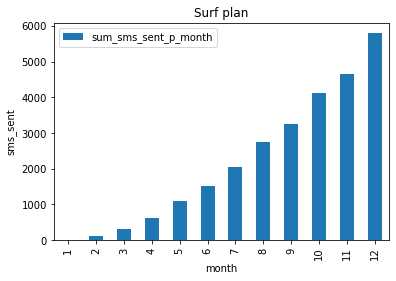

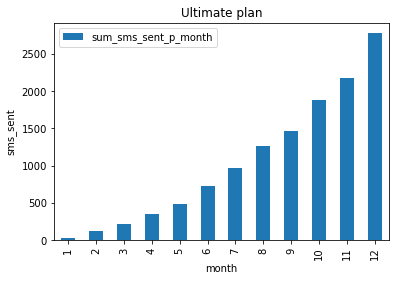

In [62]:
# showing visualy what i said above
merged_pivot_sum.query('plan == "surf"').plot.bar(x = 'month', y = 'sum_sms_sent_p_month')
# adding title and axis names
plt.title('Surf plan')
plt.xlabel('month')
plt.ylabel('sms_sent')

merged_pivot_sum.query('plan == "ultimate"').plot.bar(x = 'month', y = 'sum_sms_sent_p_month')
# adding title and axis names
plt.title('Ultimate plan')
plt.xlabel('month')
plt.ylabel('sms_sent')
plt.show();

so as i said, it can be seen from the graphes that each month has a bigger value per plan than the previous month and also that the ultimate plan is used less in total then the surf plan per month

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please add the axis labels and the title to the graph.
This applies to all other graphs too.
</div>

<div class="alert alert-info"> <b> done </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that as Data Analyst you should describe graphs in details and make a corresponding conclusion. 
    
Please see the following link how graphs can be described: http://explainwell.org/index.php/table-of-contents-handle-numbers/phrases-and-6-analysis-steps-to-interpret-a-graph/
</div>

<div class="alert alert-info"> <b> done </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you analyzed the graphs.
</div>

lets check the original table:

In [ ]:
merged.query('month == 12 and plan == "surf"')

so after checking each month in the same plan i noticed that each month has more rows than the one before it. (month 12 of surf plan has more rows than month 11 of surf plan etc..) which means that each passing month more users used the services than the previous one, and it started specifically in month January which is weird unless the company started to offer the plans in 01/2018 (2018 was their first year).

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you have made a correct conclusion :)
</div>

In [ ]:
# comparing the same months as the surf to see the number of users.
merged.query('month == 12 and plan == "ultimate"')

each month there are less users in the ultimate plan then in the surf plan, thats why there is less usage in general per month in the ultimate, its probably due to the price of the surf plan which attracts every month more users then the ultimate.

<div class="alert alert-info"> <b> from here i am continuing with my logic this time </b>

In [ ]:
merged

lets check which of the plans brings in more revenue in total:

In [ ]:
# calculating total revenue for each plan
surf_total_revenue = merged.query('plan == "surf"')['revenue'].sum()
ultimate_total_revenue = merged.query('plan == "ultimate"')['revenue'].sum()
round(surf_total_revenue)
round(ultimate_total_revenue)

if we wanted the **total** revenue for each plan then the **surf** plan is better.<br>
but now lets check the **average** revenue for the whole of each plan:

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, the surf plan seems to be more profitable.
</div>

In [ ]:
# calculating average revenue for each plan
surf_avg_revenue = merged.query('plan == "surf"')['revenue'].mean()
ultimate_avg_revenue = merged.query('plan == "ultimate"')['revenue'].mean()
round(surf_avg_revenue)
round(ultimate_avg_revenue)

if we wanted the **average** revenue for the whole of each plan then the **ultimate** plan is better.<br>
but now lets check the **average revenue for a month** (and not **in each month**):

In [ ]:
sum_revenue_for_month_p_plan = merged.pivot_table(index = ['month', 'plan'], values = ['revenue'], aggfunc = ['sum']).reset_index()
sum_revenue_for_month_p_plan.columns = ['month', 'plan', 'sum_revenue']
surf_avg_revenue_for_month = sum_revenue_for_month_p_plan.query('plan == "surf"')['sum_revenue'].mean()
ultimate_avg_revenue_for_month = sum_revenue_for_month_p_plan.query('plan == "ultimate"')['sum_revenue'].mean()
round(surf_avg_revenue_for_month)
round(ultimate_avg_revenue_for_month)

if we wanted the **average revenue for a month** for each plan then the **surf** is also better. <br>
now lets check the **average revenue in each month**:

In [ ]:
# the average revenue per user per month in each plan
mean_user_revenue_p_month_p_plan = merged.pivot_table(index = ['month', 'plan'], values = ['revenue'], aggfunc = ['mean']).reset_index()
mean_user_revenue_p_month_p_plan.columns = ['month', 'plan', 'mean_revenue']
mean_user_revenue_p_month_p_plan

so per user the average revenue is higher each month in the **ultimate** plan.<br>
(for example in month 6 the avg revenue from all the surf users is 47.6 and from all the ultimate users is 103.5)<br>
now lets take the mean of all the means per plan to get the avg revenue per user in total (and not per month):

In [ ]:
surf_avg_revenue_from_user = mean_user_revenue_p_month_p_plan.query('plan == "surf"')['mean_revenue'].mean()
ultimate_avg_revenue_from_user = mean_user_revenue_p_month_p_plan.query('plan == "ultimate"')['mean_revenue'].mean()
surf_avg_revenue_from_user
ultimate_avg_revenue_from_user

here we see that the **ultimate's** plan avg revenue for user is 2 times greater then surf's plan.

<div class="alert alert-info"> <b> and thats why its is important to be specific in what we are tasked to calculate exactly!<br>
    so please tell me what was meant from those options above (and thats not all the options possible)</b>

<div class="alert alert-info"> <b> its from here that i lost the logic of what i am doing and just did what the instructor said without following/understanding why i am doing what i am doing (so i started again **above** with my logic this time) </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
There may be several approaches here. The main thing is that it should be reasoned.
</div>

###### Since the instructor/tutor told me to plot histograms of the table from step 2 thats what i am doing:

In [ ]:
merged.hist(['messages_sent', 'minutes_used', 'gb_used'], figsize = (10, 10))
plt.show()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please analyse graphs? Here it will be nice to describe the type of distribution, an outliers and so on.
</div>

<div class="alert alert-info"> <b> i need you to first tell me what i should plot histograms of?? in the task it just says "plot histograms".. of what? to what end? **for example:** am i tasked to find out what is the usage of data by users in general or per plan? or maybe in general and per month, or maybe per plan per month... <br>
    so again, please explain to me step 3: "Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, dispersion, and standard deviation. Plot histograms. Describe the distributions." - because its very vague, that s why i also didnt know what kind of pivot to do, with aggfunc sum or aggfunc mean, std and var.. [in the real world if the ask of the one who hired me is too vague, i just ask him to make it clearer to me what exactly the outcome he wants to achieve, and then i can conclude when and what to use (for example mean over sum etc'), and now you are the one who is kind of the one i need to ask for clarifications on what was tasked in the project.] </b>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
It's expected that in any project all graph which are included in the report should be clearly described. It's not a good practice to add graphs without explanations.
</div>

In [ ]:
# and now ill calculate the mean std and var of each plan by the table of step 2 as the tutor told me
surf_minutes_mean = merged.query('plan == "surf"')['minutes_used'].mean()
surf_sms_mean = merged.query('plan == "surf"')['messages_sent'].mean()
surf_data_mean = merged.query('plan == "surf"')['gb_used'].mean()
surf_minutes_std = merged.query('plan == "surf"')['minutes_used'].std()
surf_sms_std = merged.query('plan == "surf"')['messages_sent'].std()
surf_data_std = merged.query('plan == "surf"')['gb_used'].std()
surf_minutes_var = merged.query('plan == "surf"')['minutes_used'].var()
surf_sms_var = merged.query('plan == "surf"')['messages_sent'].var()
surf_data_var = merged.query('plan == "surf"')['gb_used'].var()

ultimate_minutes_mean = merged.query('plan == "ultimate"')['minutes_used'].mean()
ultimate_sms_mean = merged.query('plan == "ultimate"')['messages_sent'].mean()
ultimate_data_mean = merged.query('plan == "ultimate"')['gb_used'].mean()
ultimate_minutes_std = merged.query('plan == "ultimate"')['minutes_used'].std()
ultimate_sms_std = merged.query('plan == "ultimate"')['messages_sent'].std()
ultimate_data_std = merged.query('plan == "ultimate"')['gb_used'].std()
ultimate_minutes_var = merged.query('plan == "ultimate"')['minutes_used'].var()
ultimate_sms_var = merged.query('plan == "ultimate"')['messages_sent'].var()
ultimate_data_var = merged.query('plan == "ultimate"')['gb_used'].var()

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please output values of the mean, dispersion, and standard deviation for both plans. Please analyse these values and make a corresponding conclusions.
</div>

In [ ]:
# comparing plans minutes
surf_minutes_mean
surf_minutes_std
surf_minutes_var
print()
ultimate_minutes_mean
ultimate_minutes_std
ultimate_minutes_var

means are essentially the same which would mean that all the users used 427.5 minutes on average per something (its not per month because of the nature of the table i am using here... and i dont really know what its a mean of..)<br>
stds are different and so are the variances, but again i cant conclude from it anything if i dont dollow the logic of what are we trying to find doing those calculations on this table (merged) the way this table is...

In [ ]:
# comparing plans sms
surf_sms_mean
surf_sms_std
surf_sms_var
print()
ultimate_sms_mean
ultimate_sms_std
ultimate_sms_var

In [ ]:
# comparing plans data
surf_data_mean
surf_data_std
surf_data_var
print()
ultimate_data_mean
ultimate_data_std
ultimate_data_var

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you calculated the mean, variance and standard deviation for both plans, analysed it and made a corresponding conclusions.
</div>

###### Conclusion: i am not sure at all what step 3 was about and it doesnt make sense what the instructors telling me and what happens after i execute it, i would be glad for you to clarify what is meant to do in this step exactly

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please analyse and remove an outliers. I recommend to use boxplots to see an outliers clearly.
    
Please see for details: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51, https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba  
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 2:
    
Please see for details how to analyse an outliers: https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643
</div>

## Step 4. Test the hypotheses

1 - The average revenue from users of Ultimate and Surf calling plans differs.

- To test this hypothesis first we need to define H0 and H1. <br>
since it is more probable that the mean revenue of the ultimate plan will be different from the mean revenue of the surf plan:
- H0: Mean(surf) == Mean(ultimate) # changed here to be == instead !=
- H1: Mean(surf) != Mean(ultimate) # here changed backwards
- To test it, we'll apply the method scipy.stats.ttest_ind (array1, array2, equal_var). <br>
equal_var = False  because the variance of the samples is different.

alpha = 5% by convention.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please check hypotheses formulation. Please note that t-test is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
    
Additional materials: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
</div>

<div class="alert alert-info"> <b> i dont understand the problem, but after checking with a tutor, he said i should just change the H0 to be == <br>
    so i did that..</b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
The mistake was that $H_0$ as $H_1$. Now it's correct, well done!
</div>

In [ ]:
merged_surf = merged.query('plan == "surf"')
merged_ultimate = merged.query('plan == "ultimate"')

In [ ]:
alpha = 0.05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(merged_surf['revenue'], merged_ultimate['revenue'], equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    #print("We reject the null hypothesis, surf & ultimate means could be equal")
    print("We reject the null hypothesis, surf & ultimate means are not equal")
else:
    #print("We can't reject the null hypothesis, surf & ultimate means are not equal")
    print("We can't reject the null hypothesis, surf & ultimate means could be equal")

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that we have a statistically significant differences in the average revenue from users of Ultimate and Surf plans.
</div>

<div class="alert alert-info"> <b> i dont understand the problem here too, thats why the equal_var is False, still, i changed the outcome text.. </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right, there is a statistically significant difference.
</div>

2- The average revenue from users in NY-NJ area is different from that of the users from other regions.
- To test this hypothesis first we need to define H0 and H1. <br>
since it is more probable that the mean revenue from users in NY-NJ will be different then the mean revenue of users from other regions:
- H0: Mean(revenue in NY-NJ area) == Mean(revenue in other regions) # changed here to be == instead !=
- H1: Mean(revenue in NY-NJ area) != Mean(revenue in other regions) # here changed backwards
- To test it, we'll apply the method scipy.stats.ttest_ind (array1, array2, equal_var). <br>
equal_var = False  because the variance of the samples is different.

alpha = 5% by convention.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please check hypotheses formulation?
</div>

<div class="alert alert-info"> <b> changed the H0 here as well to be == </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Great, now hypoteses formulation is correct :)
</div>

In [ ]:
NY_NJ = merged.query('city == "new york-newark-jersey city, ny-nj-pa msa"')
other_regions = merged.query('city != "new york-newark-jersey city, ny-nj-pa msa"')

In [ ]:
alpha = 0.05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(NY_NJ['revenue'], other_regions['revenue'], equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis, NY-NJ and other_regions means could be equal")
else:
        print("We can't reject the null hypothesis, NY-NJ and other_regions means are not equal")

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, there is no a statistically significant differences in the average revenue from users in NY-NJ area and users from other regions.
</div>

## Step 5. Write an overall conclusion

1 **Preprocessing** - originally i had data in 5 different tables, about the usage of telephone plans and the plans themselves.
The data didn't contain nulls that needed to be calculated to fill and had no errors or duplicates.
first i organized the tables by lower casing all the relevant object columns. <br>
then i filled the missing values in churn_date with 'current date' because it was stated so in the project description. then converted all the date columns to datetime. then i checked for duplicates. then i calculated the calls, sms, and data used per month for each user and merged the tables into 1 table, and in the end i got a table of 2303 rows with no NaN and no duplicates per user per month.<br>

2 **Analyzing the data** - waiting for your reply


3 **Testing the hypotheses** - 
i rejected the first H0, and could have done so even with a p-value of 1% and we got much less. That means the result is trustable. same with the second H0

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Well done that you described man results of the project, but please choose the most profitable plan and explain your decision.
</div>

<div class="alert alert-info"> <b> for that i need to know what are the criteria for choosing a method to check which plan is more profitable, as i showed above there could be different answers to this depending on the exact method of checking.. </b>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Good job that you described different way to choose the most profitable plan.
    
The activity of users of tariff plans differs from each other, as shown by the analysis of the distribution of average values and the variability of the services provided.

Users of the Ultra tariff behave chaotically, there is no clear trend for months. Nevertheless, on average, most customers fit into the subscription plan - less than a quarter of customers pay extra for exceeding the limits.

Most often, users exceeded the limits on Internet traffic. This is probably due to a larger percentage of revenue from users of the Smart tariff. In addition, it is the subscriber of this tariff plan who has the maximum revenue in the sample.

Thus, the Smart tariff will be more profitable for the operator while maintaining the current limits on the subscription fee.
</div>